# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

Импортируем необходимые библиотеки (в ходе проекта список будет пополняться):

In [1]:
import pandas as pd
#для деления на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split 
#для метрики качества
from sklearn.metrics import accuracy_score
#для модели "Дерево решений"
from sklearn.tree import DecisionTreeClassifier
#для модели "Случайный лес"
from sklearn.ensemble import RandomForestClassifier 
#для модели "Логистическая регрессия"
from sklearn.linear_model import LogisticRegression
#для среднеквадратичной ошибки
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.metrics import confusion_matrix



Откроем файл:

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

Изучим данные:

In [3]:
#выведем первые пять строк на экран
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
#изучим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод:** Согласно описанию проекта данные уже предобработаны, из анализа информации по дата фрейму с данными все в порядке. Единственное, можно было бы перевести данные о количестве звонков и sms-сообщений в целочисленный тип, но это не повлияет на последующие этапы, поэтому оставим так, как есть.

## Разбейте данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки. Размеры тестового и валидационного наборов обычно равны. Исходные данные разобъем в соотношении 3:1:1. 

Выполним извлечение признаков и целевых признаков:

In [5]:
#извлекаем признаки
features = df.drop(['is_ultra'], axis=1)
#извлекаем целевые признаки
target = df['is_ultra']

Обучающая выборка:

In [6]:
#оставляем 25% на тестовую и валидационную выборки
df_train, df_test_valid = train_test_split(df, test_size=.25, random_state=12345)
#распределяем данные на тестовую и валидационную выборки в соотношении 1:1
df_test, df_valid = train_test_split(df_test_valid, test_size=.5, random_state=12345)

Проверим размеры выборок:

In [7]:
print('Размер обучающей выборки:', len(df_train))
print('Размер валидационной выборки:',len(df_valid))
print('Размер тестовой выборки:',len(df_test))

Размер обучающей выборки: 2410
Размер валидационной выборки: 402
Размер тестовой выборки: 402


## Исследуйте модели

Выполним извлечение признаков из обучающей выборки:

In [8]:
features_train=df_train.drop(['is_ultra'],axis=1)
target_train=df_train['is_ultra']

Выполним извлечение признаков из валидационной выборки:

In [9]:
features_valid=df_valid.drop(['is_ultra'],axis=1)
target_valid=df_valid['is_ultra']

Выполним извлечение признаков из тестовой выборки:

In [10]:
features_test=df_valid.drop(['is_ultra'],axis=1)
target_test=df_valid['is_ultra']

Исследуем три модели: "Дерево решений", "Случайный лес", "Логистическая регрессия".

**"Дерево решений"**

Определим при какой максимальной глубине качество модели будет наилучшим. Возьмем интервал глубины от 1 до 20:

Наилучший Accuracy: 0.8009950248756219 Глубина дерева: 8 Функция для измерения качества раскола: entropy Минимальное количество образцов: 10


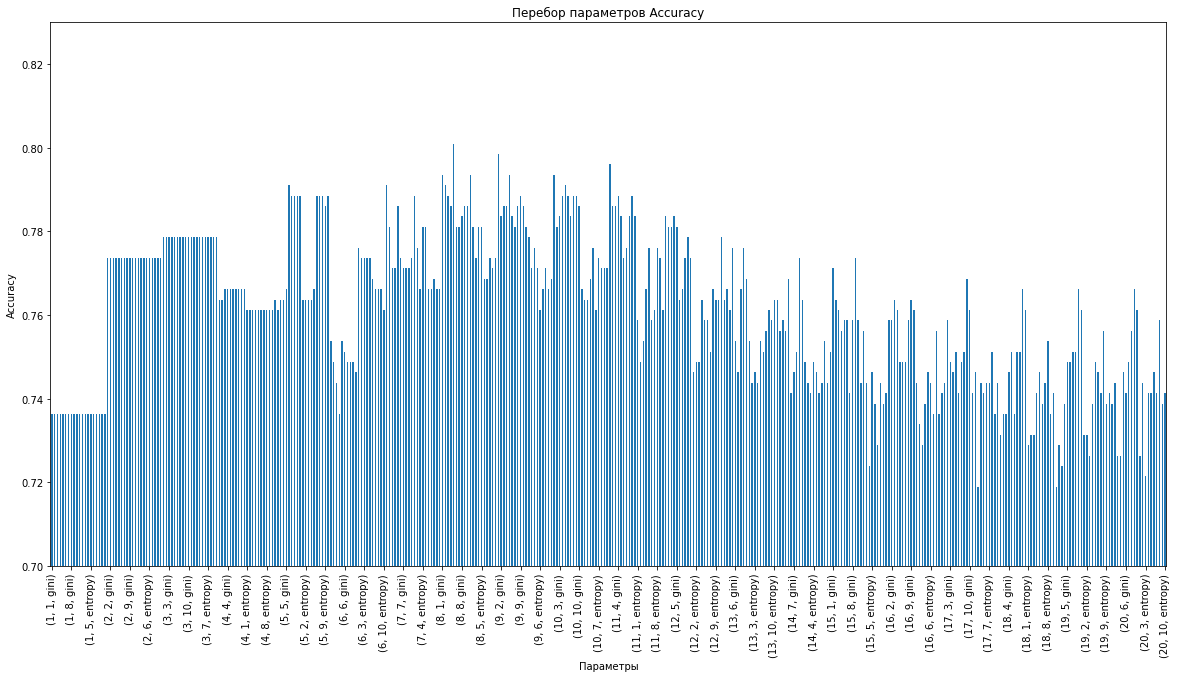

In [11]:
best_result_tree = 0
accurasy_tree = {}
for depth in range(1,21):
    for criterion in ['gini', 'entropy']:
        for leaf in range(1,11):
            model_tree=DecisionTreeClassifier(random_state=12345, max_depth=depth, criterion = criterion, min_samples_leaf=leaf) # присваиваем модели имя
            model_tree.fit(features_train,target_train) # обучаем
            prediction_tree=model_tree.predict(features_valid) # проверяем
            result_tree = accuracy_score(prediction_tree,target_valid)
            accurasy_tree [depth, leaf, criterion] = result_tree
            if result_tree > best_result_tree:
                best_result_tree = result_tree
                best_depth_tree = depth
                best_criterion_tree = criterion
                best_leaf_tree = leaf
                
print('Наилучший Accuracy:', best_result_tree, 'Глубина дерева:', best_depth_tree, 'Функция для измерения качества раскола:', criterion, 'Минимальное количество образцов:', leaf)
pd.Series(accurasy_tree).plot.bar(ylim=(0.7,0.83),figsize=(20,10))
plt.xticks(np.arange(0,400,7))
plt.title('Перебор параметров Accuracy')
plt.xlabel('Параметры')
plt.ylabel('Accuracy');

**"Случайный лес"**

Определим при какой максимальной глубине и количестве деревьев качество модели будет наилучшим. Возьмем интервал глубины и количества деревьев от 1 до 20:

In [12]:
accurasy_forrest = {}
best_est_forrest = 0
best_depth_forrest = 0
best_result_forrest = 0
for est in range(1, 21):
    for depth in range(1, 21):
        for criterion in ['gini', 'entropy']:
            for leaf in range(1,11):
                model_forrest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth, criterion = criterion, min_samples_leaf=leaf)
                model_forrest.fit(features_train, target_train)
                predictions_forrest = model_forrest.predict(features_valid)
                result_forrest = accuracy_score(predictions_forrest, target_valid)
                accurasy_forrest [est, depth, criterion, leaf] = result_forrest
                if best_result_forrest < result_forrest:
                    best_est_forrest = est
                    best_depth_forrest = depth
                    best_result_forrest = result_forrest
            
print('Наилучший Accuracy:', best_result_forrest, 'Максимальная глубина:', best_depth_forrest, 'Количество деревьев:', best_est_forrest, 'Функция для измерения качества раскола:', criterion, 'Минимальное количество образцов:', leaf)            


Наилучший Accuracy: 0.818407960199005 Максимальная глубина: 8 Количество деревьев: 14 Функция для измерения качества раскола: entropy Минимальное количество образцов: 10


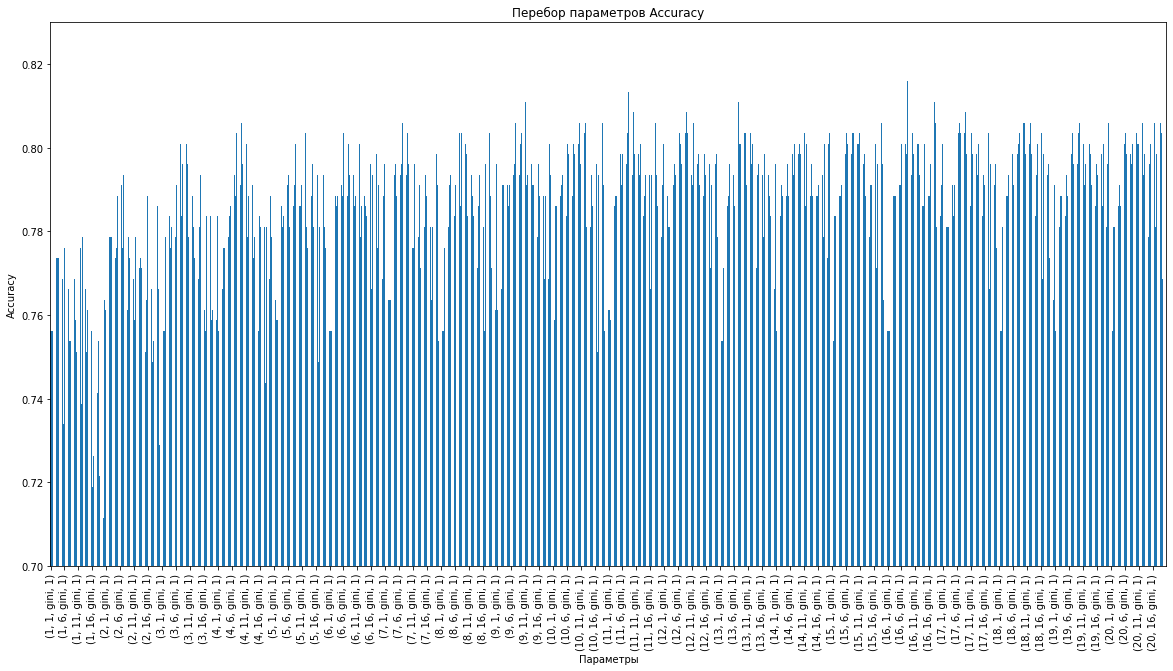

In [13]:
pd.Series(accurasy_forrest).plot.bar(ylim=(0.7,0.83),figsize=(20,10))
plt.xticks(np.arange(0,8000,100))
plt.title('Перебор параметров Accuracy')
plt.xlabel('Параметры')
plt.ylabel('Accuracy');

**"Логистическая регрессия"**

In [14]:
model_log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=12345) 
model_log_reg.fit(features_train,target_train) 
predict_log_reg = model_log_reg.predict(features_valid)
result_log = accuracy_score(predict_log_reg,target_valid)
print('Accuracy:',result_log)

Accuracy: 0.7039800995024875


**Вывод:** Согласно значениям Accuracy наилучшей моделью является модель "Случайный лес", наименее эффективной является "Логистическая регрессия".

In [ ]:
<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация </b>

Все здорово!

## Проверьте модель на тестовой выборке

Самой качественной моделью согласно анализу является модель "Случайный лес". Проверим данную модель на тестовой выборке.

In [15]:
model_forrest_test=RandomForestClassifier(random_state=12345, n_estimators = 14, max_depth = 8, criterion = 'entropy', min_samples_leaf=10)
model_forrest_test.fit(features_train,target_train)
prediction_forrest_test=model_forrest_test.predict(features_test)
print('Test Accuracy:',accuracy_score(prediction_forrest_test,target_test))

Test Accuracy: 0.8059701492537313


Сравним метрики качества тестовой и валидационной модели:

In [16]:
print('Метрика качества валидационной модели:', best_result_forrest)
print('Метрика качества тестовой модели:', accuracy_score(prediction_forrest_test,target_test))

Метрика качества валидационной модели: 0.818407960199005
Метрика качества тестовой модели: 0.8059701492537313


**Вывод:** Метрика качества тестовой модели больше 0,75 и близка к значению метрики на валидационной модели.

## (бонус) Проверьте модели на адекватность

Для проверки на адекватность составим матричное представление о количестве ложно- и истино- положительных и отрицательных результатах. Для проверки будем использовать матрицу ошибок.

In [17]:
confusion_matrix(predictions_forrest, target_valid)

array([[261,  58],
       [ 22,  61]])

**Вывод:** Согласно матрице ошибок у нас 261 - истиноположительный результат, 61 - истиноотрицательный, 22 - ложноположительных и 58 - ложноотрицательных. Истинных значений у нас 261+61=322, это составляет 322/402 * 100% = 80,1% от общего числа значений. Модель адекватна.